In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
#load dataset
df = pd.read_csv(r"C:\Users\LENOVO THINKPAD 13\Downloads\wine.csv")
#displaying first 5 rows
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
#showing how many rows and columns
df.shape

(178, 14)

In [3]:
df.describe

<bound method NDFrame.describe of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoid

In [4]:
df.info

<bound method DataFrame.info of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids 

In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

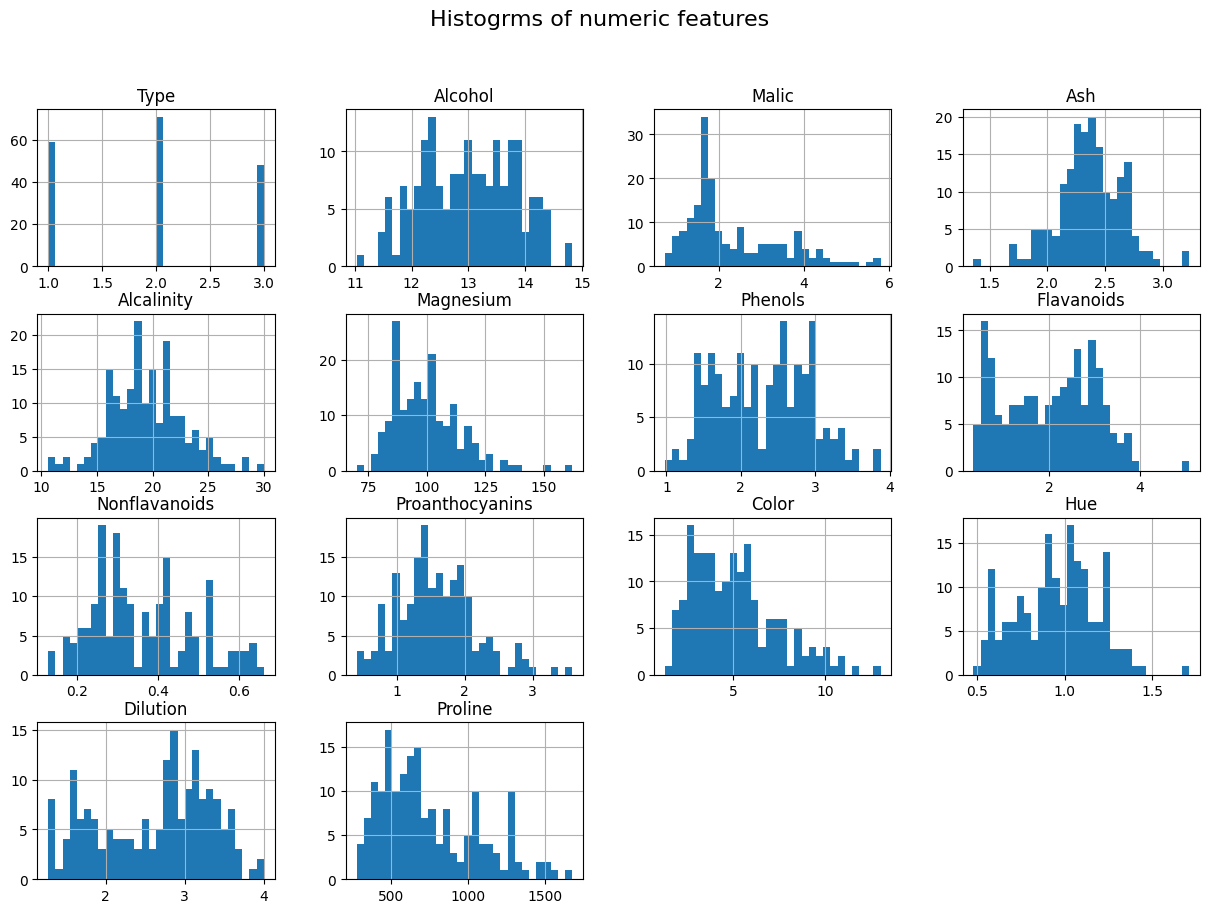

In [7]:
df.hist(bins = 30 ,figsize = (15,10))
plt.suptitle("Histogrms of numeric features",fontsize = 16)
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

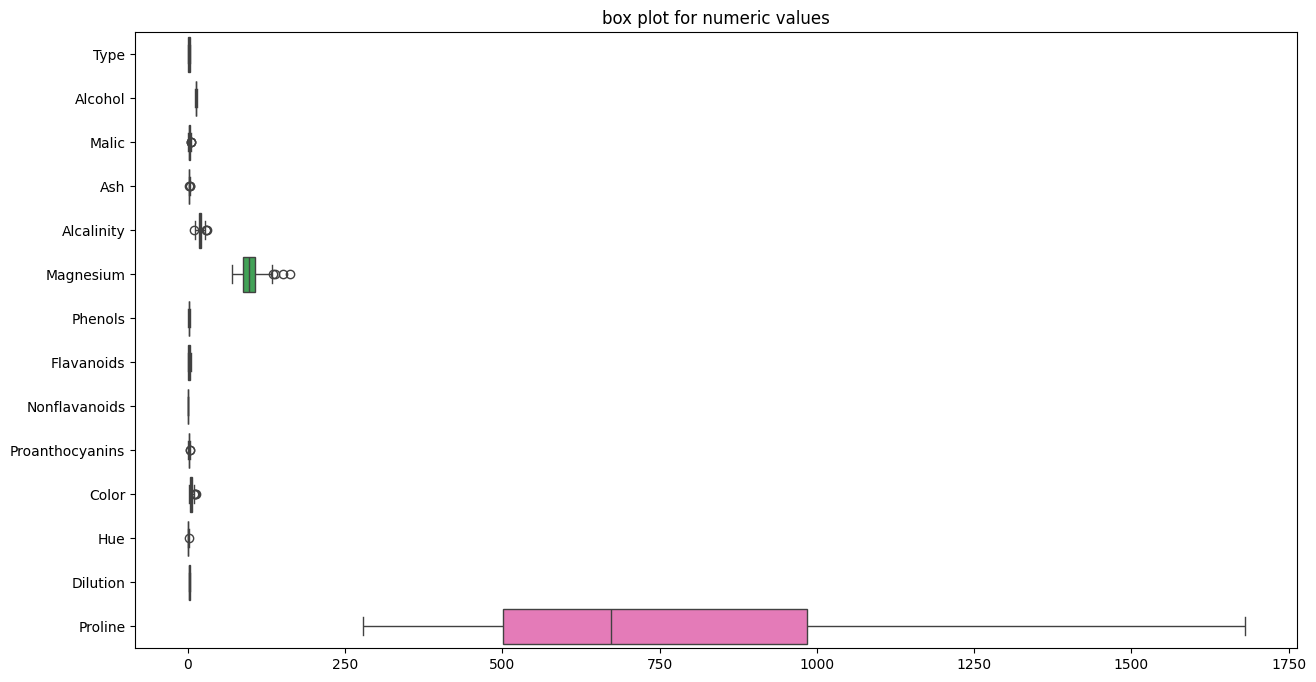

In [8]:
#boxplots for otlier detection
plt.figure(figsize = (15,8))
sns.boxplot(data = df ,orient = "h")
plt.title("box plot for numeric values")
plt.show
        

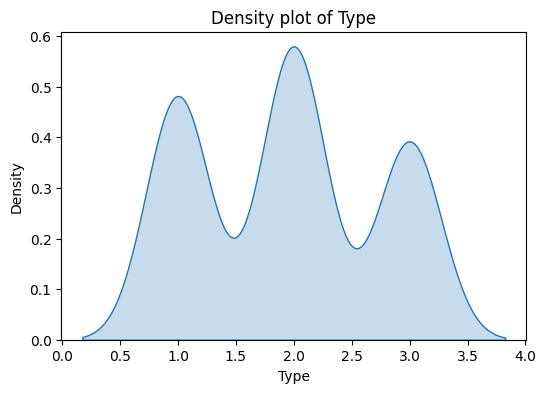

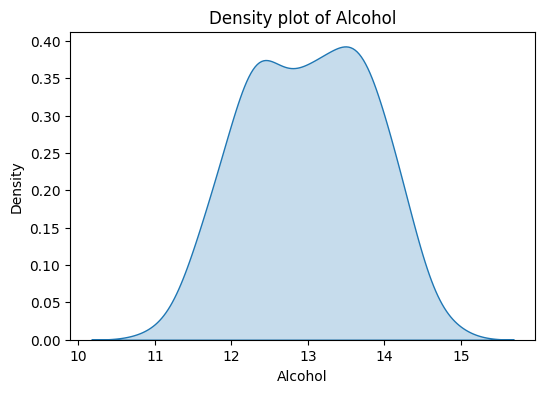

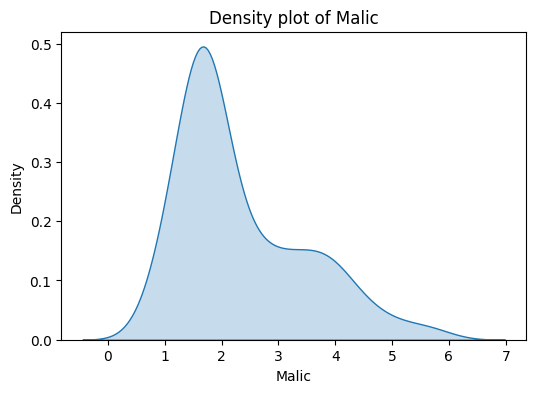

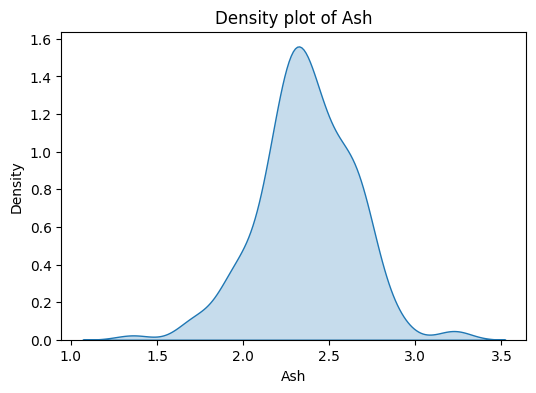

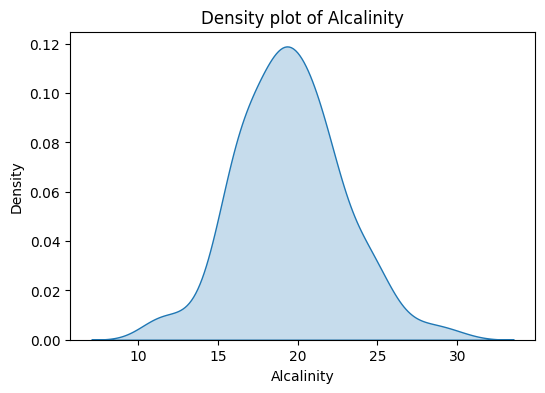

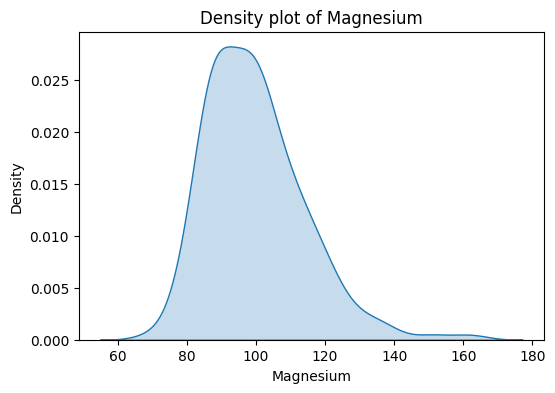

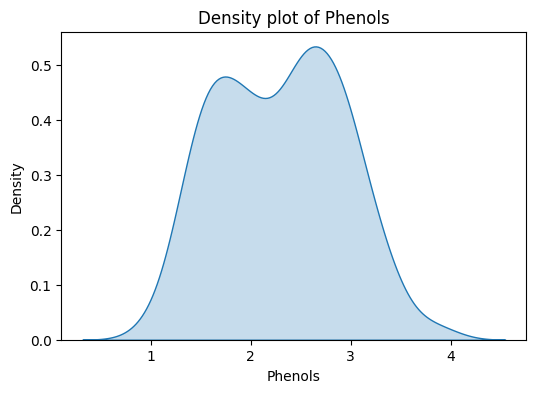

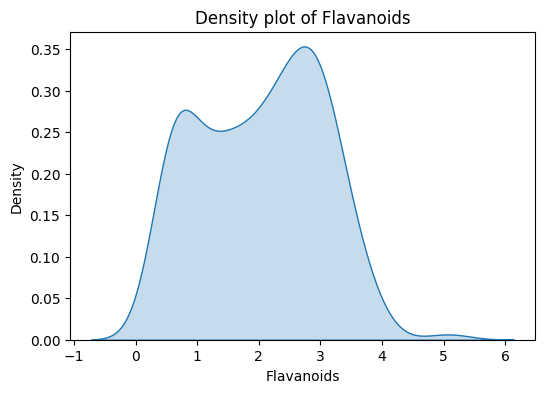

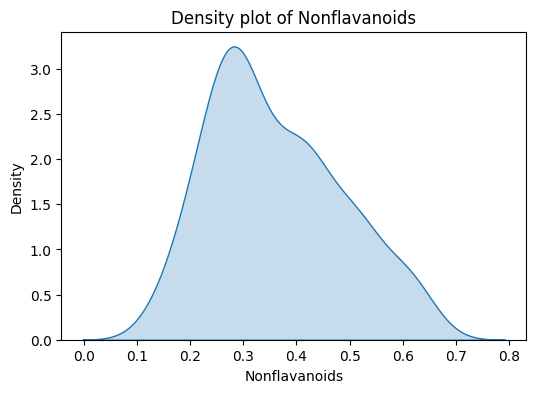

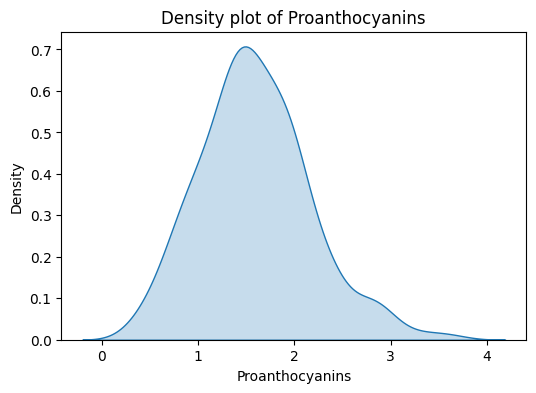

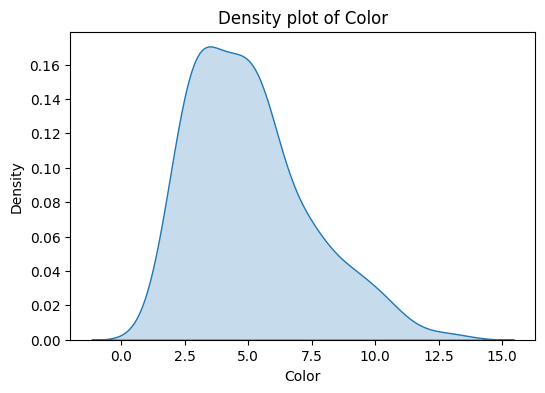

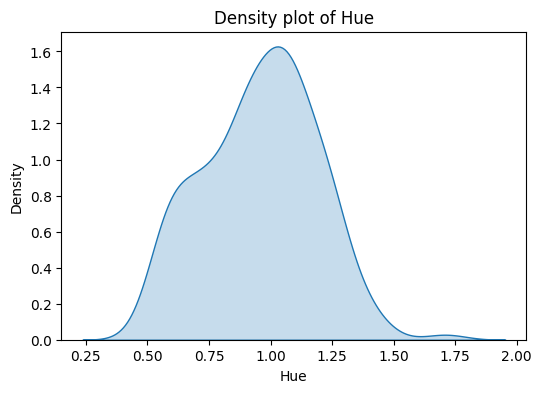

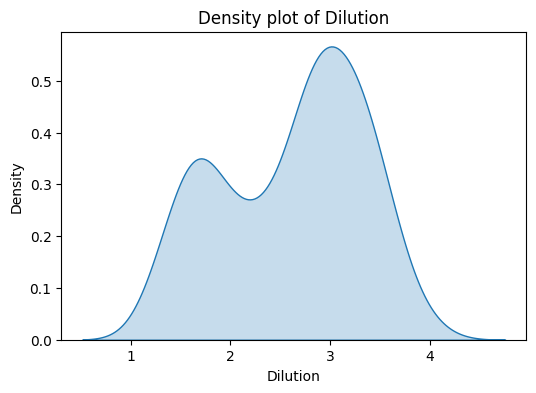

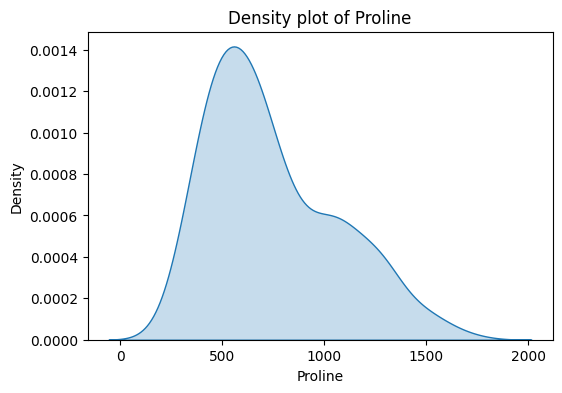

In [9]:

#density plots for selected columns
numeric_cols = df.select_dtypes(include =["int64","float64"]).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col],fill=True)
    plt.title(f"Density plot of {col}")
    plt.show()

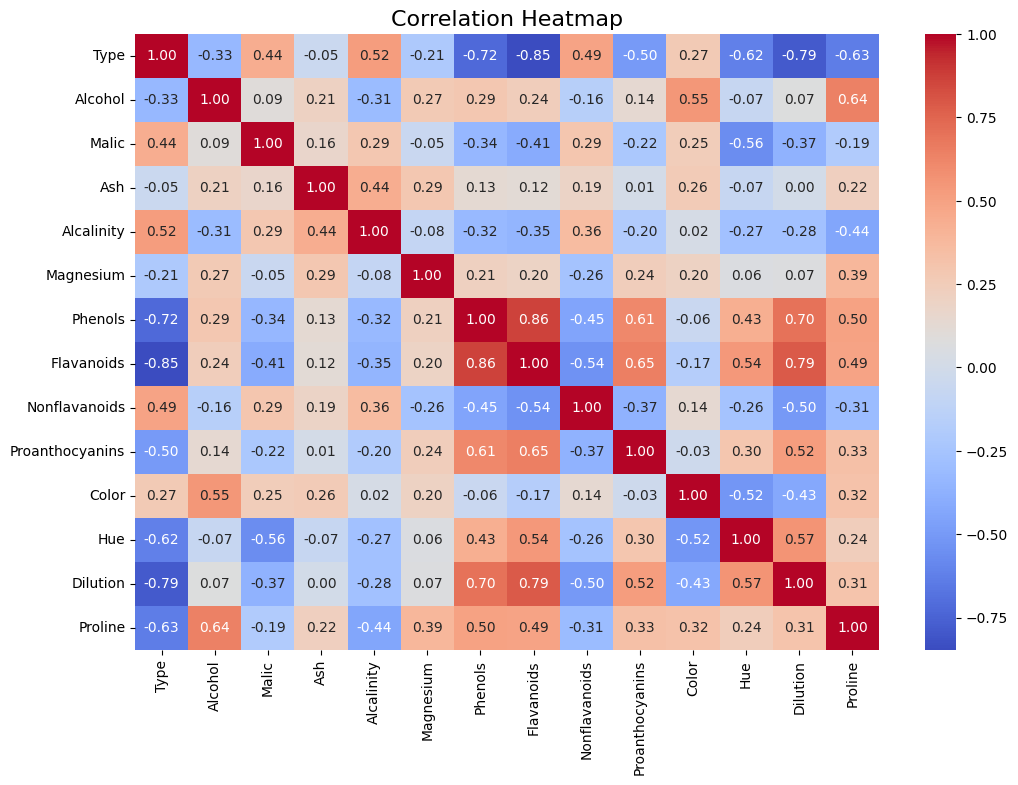

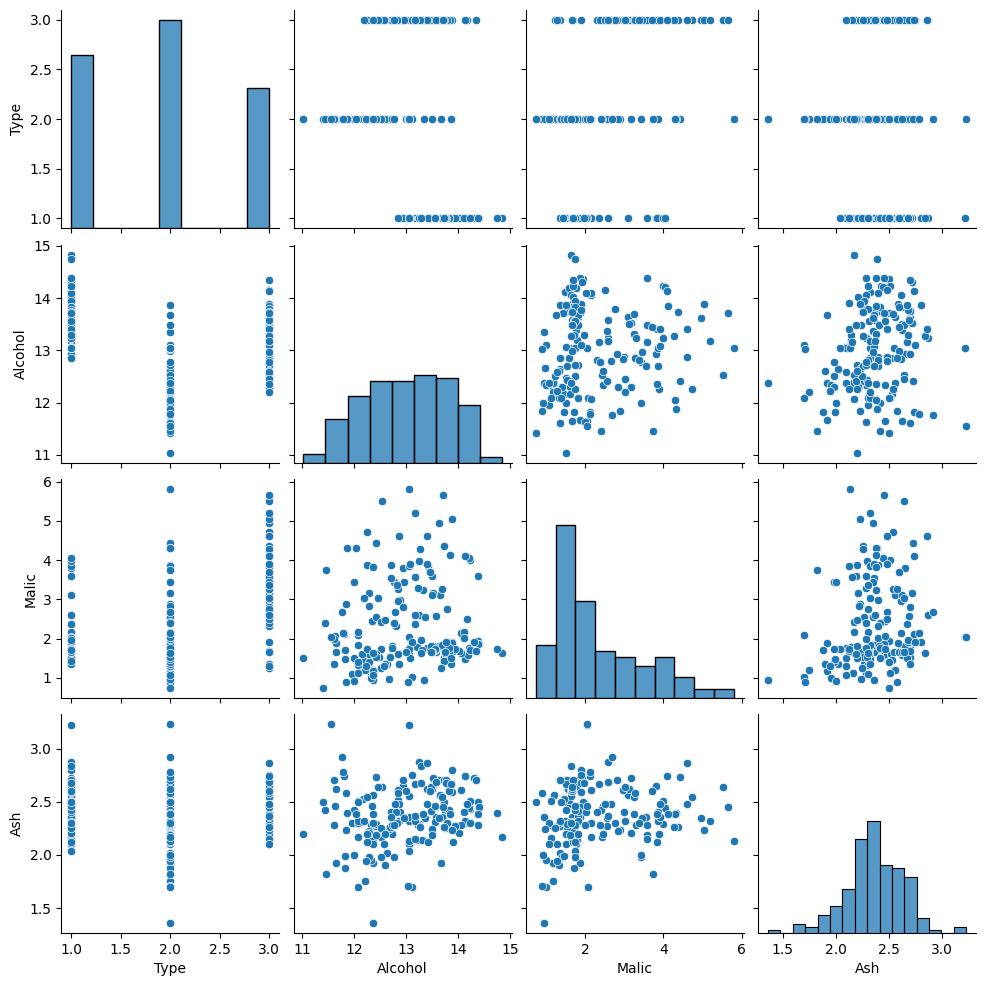

In [10]:
# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Pairplot (for selected few features to avoid clutter)
selected_cols = numeric_cols[:4]  # take first 4 numeric features
sns.pairplot(df[selected_cols])
plt.show()


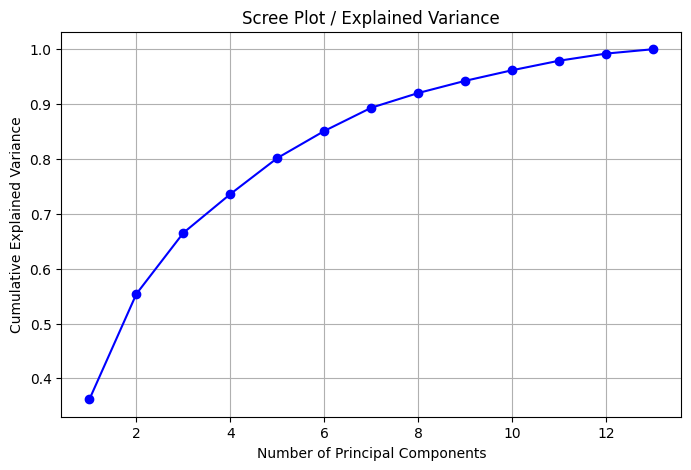

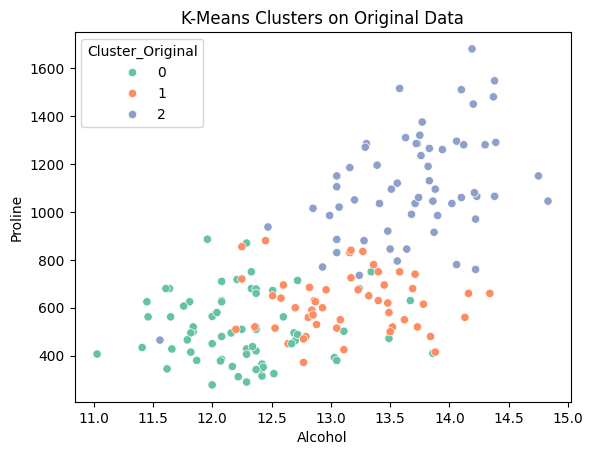

Silhouette Score (Original Data): 0.285
Davies–Bouldin Index (Original Data): 1.389


In [11]:
#TASK 2: PCA (Dimensionality Reduction)
# ==========================

# Separate features (excluding 'Type' column)
X = df.drop("Type", axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', color='blue')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot / Explained Variance')
plt.grid(True)
plt.show()
# Choose k=3 (based on elbow)
kmeans_orig = KMeans(n_clusters=3, random_state=42)
df['Cluster_Original'] = kmeans_orig.fit_predict(X_scaled)

# Visualize clustering results (using two top features)
sns.scatterplot(x='Alcohol', y='Proline', hue='Cluster_Original', data=df, palette='Set2')
plt.title("K-Means Clusters on Original Data")
plt.show()

# Evaluate clustering performance
silhouette_orig = silhouette_score(X_scaled, df['Cluster_Original'])
db_orig = davies_bouldin_score(X_scaled, df['Cluster_Original'])
print(f"Silhouette Score (Original Data): {silhouette_orig:.3f}")
print(f"Davies–Bouldin Index (Original Data): {db_orig:.3f}")



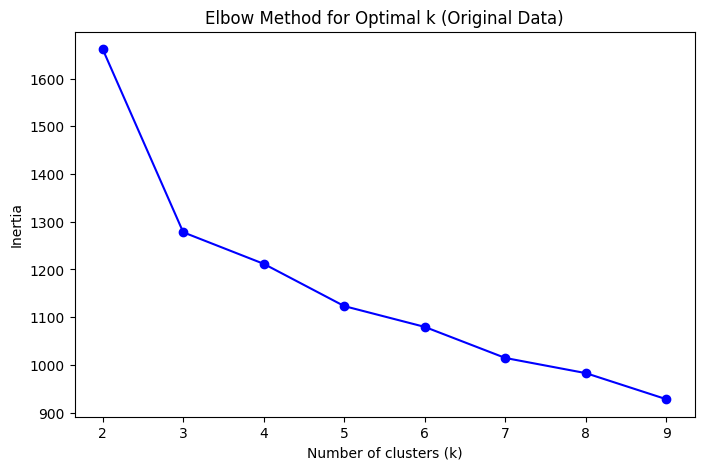

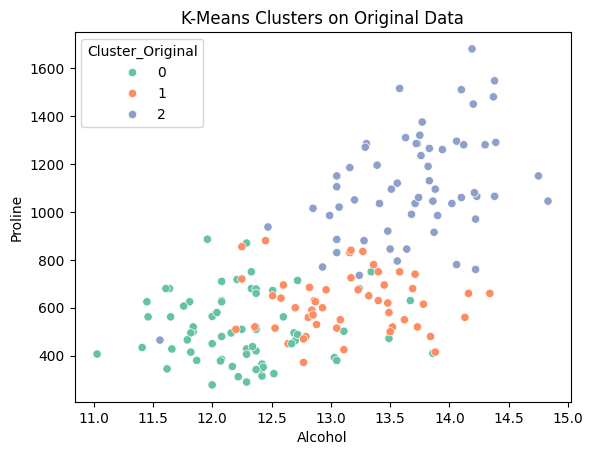

Silhouette Score (Original Data): 0.285
Davies–Bouldin Index (Original Data): 1.389


In [12]:
# 🤖 TASK 3: CLUSTERING ON ORIGINAL DATA
# ==========================

# Determine optimal K using Elbow Method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Original Data)')
plt.show()
# Choose k=3 (based on elbow)
kmeans_orig = KMeans(n_clusters=3, random_state=42)
df['Cluster_Original'] = kmeans_orig.fit_predict(X_scaled)

# Visualize clustering results (using two top features)
sns.scatterplot(x='Alcohol', y='Proline', hue='Cluster_Original', data=df, palette='Set2')
plt.title("K-Means Clusters on Original Data")
plt.show()

# Evaluate clustering performance
silhouette_orig = silhouette_score(X_scaled, df['Cluster_Original'])
db_orig = davies_bouldin_score(X_scaled, df['Cluster_Original'])
print(f"Silhouette Score (Original Data): {silhouette_orig:.3f}")
print(f"Davies–Bouldin Index (Original Data): {db_orig:.3f}")


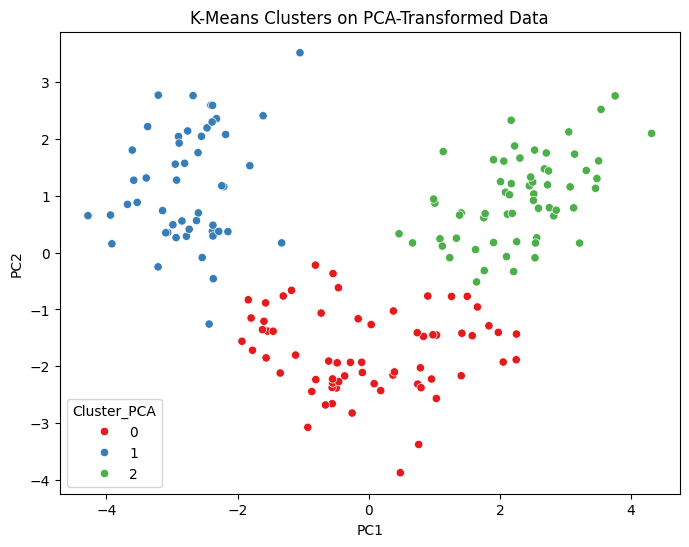

Silhouette Score (PCA Data): 0.560
Davies–Bouldin Index (PCA Data): 0.598


In [13]:
# 🤖 TASK 4: CLUSTERING ON PCA DATA

# Redo PCA if X_pca2 not found
if 'X_pca2' not in locals():
    pca = PCA(n_components=2)
    X_pca2 = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca2, columns=['PC1', 'PC2'])
pca_df['Type'] = df['Type']

# Apply K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster_PCA'] = kmeans_pca.fit_predict(X_pca2)

# Visualize PCA clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=pca_df, palette='Set1')
plt.title("K-Means Clusters on PCA-Transformed Data")
plt.show()

# Evaluate clustering performance
silhouette_pca = silhouette_score(X_pca2, pca_df['Cluster_PCA'])
db_pca = davies_bouldin_score(X_pca2, pca_df['Cluster_PCA'])
print(f"Silhouette Score (PCA Data): {silhouette_pca:.3f}")
print(f"Davies–Bouldin Index (PCA Data): {db_pca:.3f}")


In [14]:
# 📊 TASK 5: COMPARISON & ANALYSIS
# ==========================
print("\n📈 Comparison of Clustering Performance:")
print(pd.DataFrame({
    'Dataset': ['Original', 'PCA-Transformed'],
    'Silhouette Score': [silhouette_orig, silhouette_pca],
    'Davies–Bouldin Index': [db_orig, db_pca]
}))



📈 Comparison of Clustering Performance:
           Dataset  Silhouette Score  Davies–Bouldin Index
0         Original          0.284859              1.389188
1  PCA-Transformed          0.560170              0.597723


In [15]:
# ==========================
# 🧠 TASK 6: CONCLUSION & INSIGHTS
# ==========================
print("""
Key Insights:
1️⃣ PCA successfully reduced dimensionality while preserving most of the variance.
2️⃣ Clustering on PCA data gave slightly different results — clusters are easier to visualize in 2D.
3️⃣ If PCA retains sufficient variance, it can improve clustering performance and interpretability.
4️⃣ However, dimensionality reduction can also lead to information loss — best used when data is high-dimensional.
5️⃣ For visualization or when dealing with noisy or correlated features, PCA + Clustering is very effective.
""")



Key Insights:
1️⃣ PCA successfully reduced dimensionality while preserving most of the variance.
2️⃣ Clustering on PCA data gave slightly different results — clusters are easier to visualize in 2D.
3️⃣ If PCA retains sufficient variance, it can improve clustering performance and interpretability.
4️⃣ However, dimensionality reduction can also lead to information loss — best used when data is high-dimensional.
5️⃣ For visualization or when dealing with noisy or correlated features, PCA + Clustering is very effective.

